In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn 

In [2]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [3]:
x_train=np.array(raw_data_X)
y_train=np.array(raw_data_y)

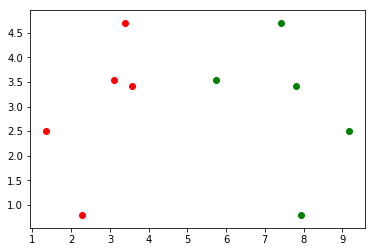

In [4]:
plt.scatter(x_train[y_train==0,0],x_train[y_train==1,1],color='r')
plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1],color='g')
plt.show()

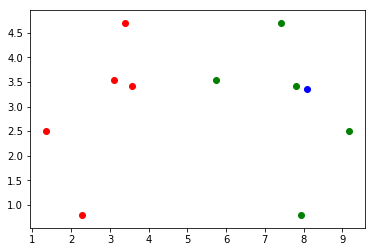

In [5]:
x = np.array([8.093607318, 3.365731514])

plt.scatter(x_train[y_train==0,0],x_train[y_train==1,1],color='r')
plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1],color='g')
plt.scatter(x[0],x[1],color='b')
plt.show()

In [6]:
# kNN
from math import sqrt
distances=[sqrt(np.sum((x_t-x)**2)) for x_t in x_train]
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [7]:
nearest=np.argsort(distances)

In [8]:
k=6

In [9]:
top_y=[y_train[n] for n in nearest[:k]]

In [10]:
top_y

[1, 1, 1, 1, 1, 0]

In [11]:
from collections import Counter
votes=Counter(top_y)

In [12]:
votes

Counter({0: 1, 1: 5})

In [13]:
votes.most_common(1)

[(1, 5)]

In [14]:
votes.most_common(1)[0][0]

1

## 自己写的KNN算法

In [15]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

x = np.array([8.093607318, 3.365731514])
x=x.reshape(1,-1)


In [16]:
%run 03_knn/KNN.py

In [17]:
knn_clf=KNNClassifier(6)

In [18]:
knn_clf.fit(x_train,y_train)

In [19]:
knn_clf.predict(x)

[1]

## 系统KNN 算法

In [20]:
from sklearn.neighbors import KNeighborsClassifier
Knn_clf=KNeighborsClassifier(n_neighbors=6)
Knn_clf.fit(x_train,y_train)
knn_clf.predict(x)

[1]

## 使用sklearn 中的鸢尾花数据进行KNN算法

In [21]:
from sklearn import datasets
iris=datasets.load_iris()

In [22]:
iris.keys()

dict_keys(['feature_names', 'target', 'filename', 'target_names', 'data', 'DESCR'])

In [41]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [27]:
iris.data.shape

(150, 4)

In [28]:
iris.target.shape

(150,)

In [31]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [36]:
X=iris.data
y=iris.target

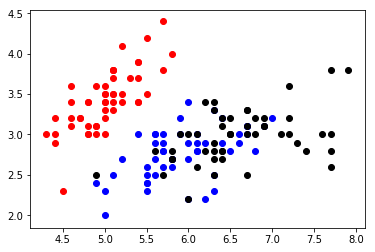

In [37]:
# 对前两列特征进行绘图

plt.scatter(X[y==0,0],X[y==0,1],color='red')
plt.scatter(X[y==1,0],X[y==1,1],color='blue')
plt.scatter(X[y==2,0],X[y==2,1],color='black')
plt.show()

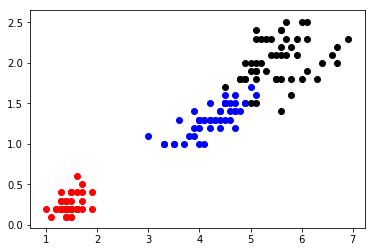

In [38]:
#对后两列特征进行绘图

plt.scatter(X[y==0,2],X[y==0,3],color='red')
plt.scatter(X[y==1,2],X[y==1,3],color='blue')
plt.scatter(X[y==2,2],X[y==2,3],color='black')
plt.show()

In [42]:
from Util.helper import train_test_spilt

In [43]:
X_train,Y_train,X_test,Y_test=train_test_spilt(X,y)

In [56]:
knn_clf=KNNClassifier(3)
knn_clf.fit(X_train,Y_train)
y_predict=knn_clf.predict(X_test)
y_predict=np.array(y_predict).reshape(1,-1)
y_predict

array([[1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1,
        1, 1, 1, 0, 0, 0, 1, 1]])

In [48]:
Y_test

array([1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1,
       1, 1, 1, 0, 0, 0, 1, 1])

## sklearn 中的数据集拆分

In [57]:
from sklearn.model_selection import train_test_split
X_train,Y_train,X_test,Y_test=train_test_spilt(X,y,test_ratio=0.2,seed=666)
knn_clf=KNNClassifier(3)
knn_clf.fit(X_train,Y_train)
y_predict=knn_clf.predict(X_test)
y_predict=np.array(y_predict).reshape(1,-1)
y_predict

array([[1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0,
        2, 0, 1, 1, 0, 1, 2, 2]])